# ***Financial Payment Services Fraud Detection Analysis*** 
**-By Deevyansh Dewangan (B.Tech, IIT Roorkee 2025)**

Financial fraud is a critical challenge in today’s digital economy. With millions of online transactions happening daily, banks and financial institutions face constant threats from fraudulent activities. Early detection of fraud is essential to protect customers, reduce losses, and maintain trust in financial systems.
I have worked on an experimental approach to develop a Fraud detection model to predict future Fraud customers based on the relevant features. The best feature variables have been selected. Also, the Random Forest Regression classifier is developed to build the predictive system.


 # Importing Basic packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv("../input/financial-payment-services-fraud-data/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Understanding Data

In [3]:
# Checking the number of rows and columns
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 6362620
Number of Columns: 11


In [4]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1889443,164,CASH_IN,340173.86,C1554344942,3799880.59,4140054.45,C106860681,848637.49,508463.64,0,0
4909857,349,CASH_IN,235894.18,C692114211,6419786.03,6655680.22,C117507634,518586.23,282692.05,0,0
4149877,303,CASH_IN,177808.86,C32214722,19046303.31,19224112.17,C1000004940,782209.93,604401.07,0,0
5493507,380,CASH_OUT,287167.57,C1366176220,0.00,0.00,C808844671,12951610.03,13238777.60,0,0
5674171,397,CASH_IN,133283.73,C1777986681,10540613.95,10673897.68,C230227542,1487857.92,1354574.20,0,0
3852769,283,CASH_OUT,33272.35,C223706353,0.00,0.00,C1947559891,1130171.82,1163444.18,0,0
1750032,161,PAYMENT,8510.01,C299159418,140311.86,131801.85,M1707132135,0.00,0.00,0,0
2609064,208,CASH_OUT,26402.12,C2111308313,369.00,0.00,C622599168,117458.64,143860.76,0,0
2097215,182,PAYMENT,25141.35,C1744458903,0.00,0.00,M244432648,0.00,0.00,0,0
3052268,234,CASH_IN,192227.95,C836486503,2966307.75,3158535.70,C290202639,2119156.10,1926928.15,0,0


In [5]:
#Getting data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#checking if any value is null
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
#Describing the numberical columns
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#checking if any duplicated values
df.duplicated().sum()

0

In [9]:
#checking correlation matix between numerical columns
num_df= df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
num_df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


# Data Preprocessing
* **Duplicate removal** : No duplicates
* **Missing Values removal** : No missing values
* **Outliers Treatment** :
  *  Interquartile Range (IQR) Method was used to check outliers but there was a lot of data points in outlier. For an example: on checking for amount column, I got range of (approx.-1.5 1e7 - 5 1e7) which meant if outliers are removed, a large amount of data will be lost (approx 15%). Similar was situation for other columns. So I have used boxplot to plot data and removed only extreme outliers visible.
* **Scaling** : This will be used later if models like logistic regression (which can be affected by not-normalized data

In [10]:
#Interquartile Range (IQR) Method

Q1 = np.percentile(df['amount'], 25, method='midpoint')
Q3 = np.percentile(df['amount'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

upper = Q3+1.5*IQR
upper_array = np.array(df['amount'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

lower = Q1-1.5*IQR
lower_array = np.array(df['amount'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

195331.935
Upper Bound: 501719.4075
338077
Lower Bound: -279608.33249999996
0


Since large amount data will be lost in Interquartile Range (IQR) Method. Therefore this is not used.

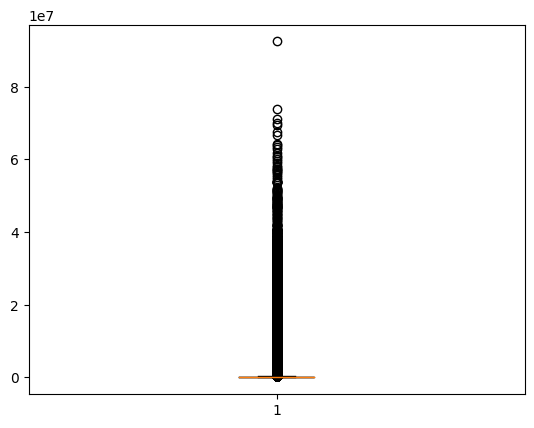

In [11]:
plt.boxplot(df['amount'])
plt.show()

In [12]:
indexNames = df[df['amount'] > 80000000].index
df.drop(indexNames , inplace=True)

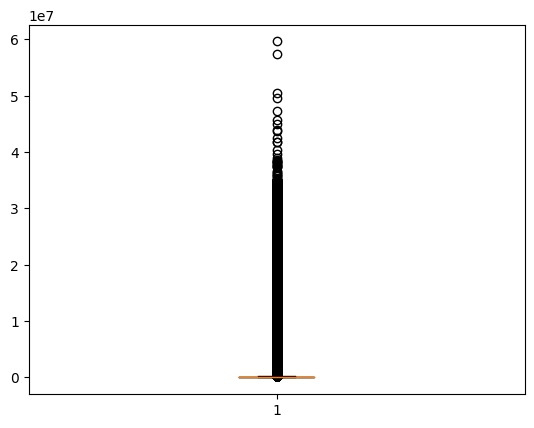

In [13]:
plt.boxplot(df['oldbalanceOrg'])
plt.show()

In [14]:
df.query('oldbalanceOrg>50000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0


In [15]:
indexNames = df[df['oldbalanceOrg'] > 50000000].index
df.drop(indexNames , inplace=True)

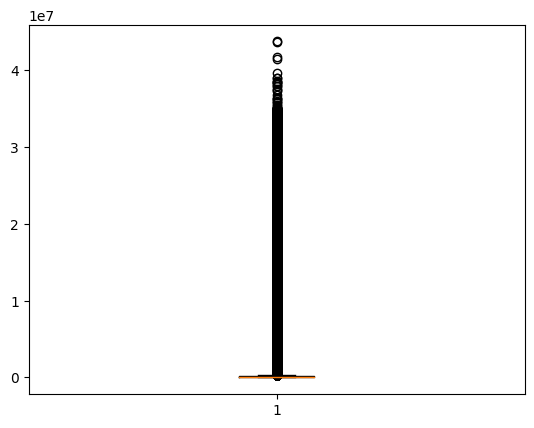

In [16]:
plt.boxplot(df['newbalanceOrig'])
plt.show()

In [17]:
df.query('newbalanceOrig>40000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4180200,304,PAYMENT,8301.85,C1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4180201,304,CASH_OUT,258483.17,C438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0
4203639,305,CASH_OUT,132238.97,C559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
4203640,305,PAYMENT,12814.12,C2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0


In [18]:
indexNames = df[df['newbalanceOrig'] > 40000000].index
df.drop(indexNames , inplace=True)

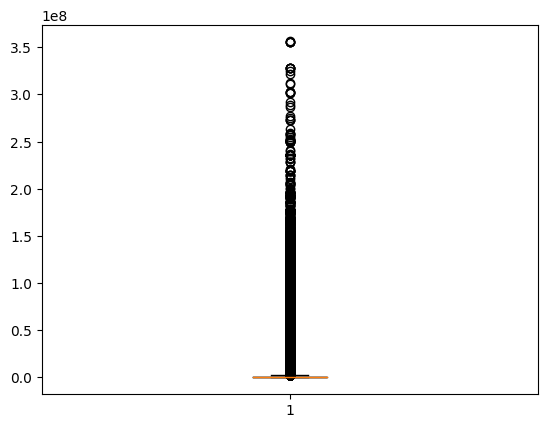

In [19]:
plt.boxplot(df['oldbalanceDest'])
plt.show()

In [20]:
df.query('oldbalanceDest>350000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4596803,328,CASH_IN,171982.69,C758787020,31748.00,203730.69,C439737079,3.555534e+08,3.553814e+08,0,0
4721497,332,CASH_IN,195896.55,C494525103,4178494.78,4374391.33,C439737079,3.553814e+08,3.551855e+08,0,0
5380607,376,CASH_OUT,194946.47,C4896808,0.00,0.00,C439737079,3.551855e+08,3.553805e+08,0,0
5486389,380,TRANSFER,635405.82,C1666289749,0.00,0.00,C439737079,3.553805e+08,3.560159e+08,0,0
5920180,404,CASH_OUT,163389.56,C1323053481,0.00,0.00,C439737079,3.560159e+08,3.561793e+08,0,0


In [21]:
indexNames = df[df['oldbalanceDest'] > 350000000].index
df.drop(indexNames , inplace=True)

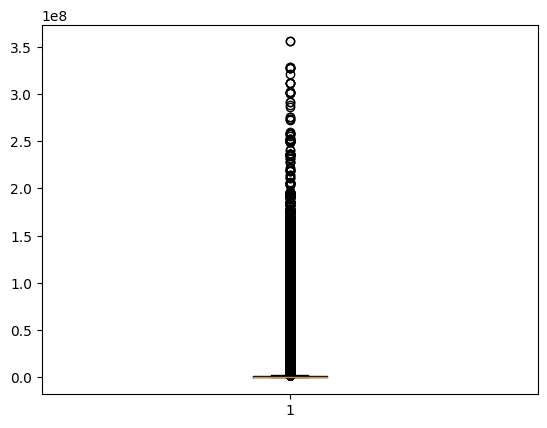

In [22]:
plt.boxplot(df['newbalanceDest'])
plt.show()

In [23]:
df.query('newbalanceDest>350000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4124250,302,TRANSFER,3325263.90,C1812458696,0.0,0.0,C439737079,3.215898e+08,355553416.3,0,0
4133583,302,TRANSFER,30638354.89,C1800693711,0.0,0.0,C439737079,3.249151e+08,355553416.3,0,0


In [24]:
indexNames = df[df['newbalanceDest'] > 350000000].index
df.drop(indexNames , inplace=True)

# Exploratory Data Analysis
* Visualization
* Univariate analysis
* Bivariate analysis
* Imbalance data

**Visualization and Univariate Analysis** \
One by one each column is analyzed in deep and deprived conclusions are listed below.

<Axes: xlabel='isFraud', ylabel='count'>

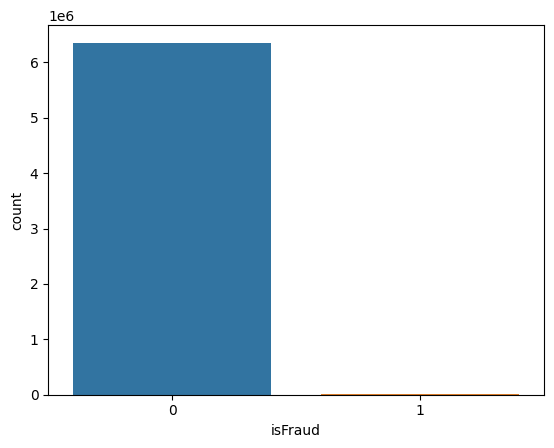

In [25]:
sns.countplot(x='isFraud',data=df)

In [26]:
df.isFraud.value_counts()

isFraud
0    6354395
1       8210
Name: count, dtype: int64

**Analysis:**
* We have imbalanced data. Majority of data points are not fraud transctions.
* We have to balance data. For this we can :
  * Either treat data imbalance by making change in data by using RandomOverSample, UnderSample, or SMOTE.
  * Or by using bootstrapping techinques in a balanced way

In [27]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362589
1         16
Name: count, dtype: int64

In [28]:
df.type.value_counts()

type
CASH_OUT    2237496
PAYMENT     2151493
CASH_IN     1399282
TRANSFER     532902
DEBIT         41432
Name: count, dtype: int64

In [29]:
amount_df = df.groupby(['type'])[['amount']].mean()
amount_df = amount_df.reset_index()
amount_df.head()

,type,amount
0,CASH_IN,168920.220537
1,CASH_OUT,176273.944698
2,DEBIT,5483.665314
3,PAYMENT,13057.606984
4,TRANSFER,910364.274711


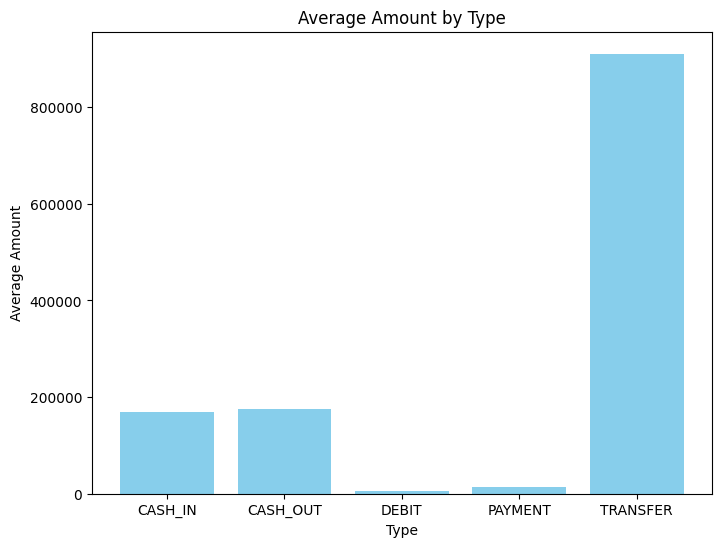

In [30]:
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.bar(amount_df['type'], amount_df['amount'], color='skyblue')

plt.title('Average Amount by Type')
plt.xlabel('Type')
plt.ylabel('Average Amount')

plt.show()

(array([6.172316e+06, 1.165780e+05, 3.627300e+04, 1.420300e+04,
        6.577000e+03, 3.448000e+03, 2.107000e+03, 1.446000e+03,
        1.084000e+03, 8.120000e+02, 7.560000e+02, 5.790000e+02,
        5.460000e+02, 3.522000e+03, 1.860000e+02, 1.710000e+02,
        1.580000e+02, 1.250000e+02, 1.390000e+02, 1.330000e+02,
        1.200000e+02, 9.700000e+01, 1.040000e+02, 8.000000e+01,
        9.000000e+01, 6.500000e+01, 6.000000e+01, 5.300000e+01,
        5.900000e+01, 4.200000e+01, 3.900000e+01, 4.200000e+01,
        4.400000e+01, 3.000000e+01, 3.600000e+01, 3.000000e+01,
        2.200000e+01, 2.600000e+01, 1.500000e+01, 2.700000e+01,
        2.200000e+01, 2.400000e+01, 2.400000e+01, 2.100000e+01,
        2.100000e+01, 1.700000e+01, 1.700000e+01, 1.800000e+01,
        2.300000e+01, 1.000000e+01, 1.800000e+01, 1.100000e+01,
        1.200000e+01, 9.000000e+00, 1.000000e+01, 7.000000e+00,
        6.000000e+00, 3.000000e+00, 2.000000e+00, 4.000000e+00,
        3.000000e+00, 4.000000e+00, 2.00

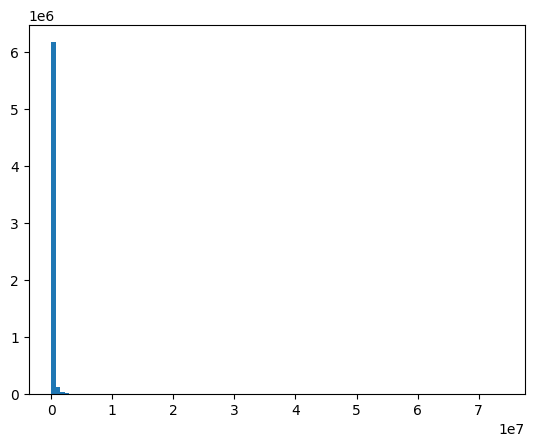

In [31]:
plt.hist(df['amount'],bins=100)

**Analysis**
* Majority of transactions amount are less than 2 lakhs.

**Bivariate Analysis**

In [32]:
#Step and isFraud analyis:
df['hour_of_day'] = df['step'] % 24
df['day_of_week'] = (df['step'] // 24) % 7

day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['day_of_week_name'] = df['day_of_week'].map(day_map)

print(df[['step', 'hour_of_day', 'day_of_week', 'day_of_week_name']].head(10))

   step  hour_of_day  day_of_week day_of_week_name
0     1            1            0           Monday
1     1            1            0           Monday
2     1            1            0           Monday
3     1            1            0           Monday
4     1            1            0           Monday
5     1            1            0           Monday
6     1            1            0           Monday
7     1            1            0           Monday
8     1            1            0           Monday
9     1            1            0           Monday


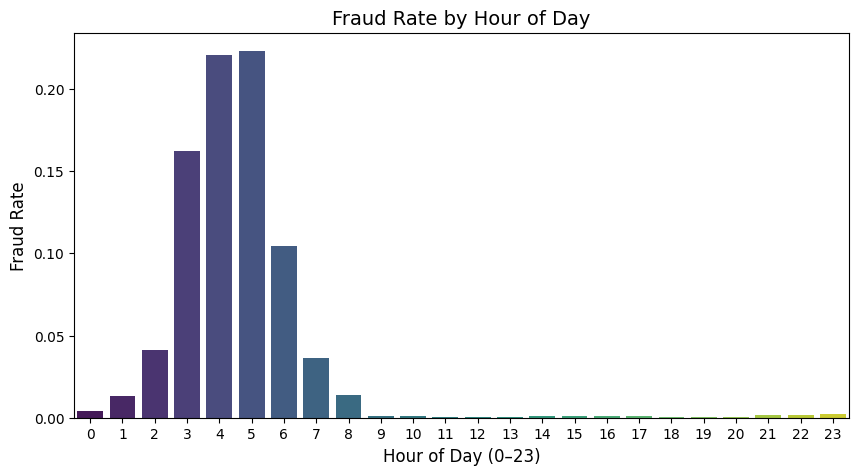

In [33]:
fraud_by_hour = df.groupby('hour_of_day')['isFraud'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, palette="viridis")
plt.title("Fraud Rate by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (0–23)", fontsize=12)
plt.ylabel("Fraud Rate", fontsize=12)
plt.show()

**Analysis**
* Step is hourly record of 744 hours after data collection started. So we have divided it by 24 hours to see if there is any specific relation between time of day and farud activities.
* It was found that **Most of Fraud transactions are done in 0-8 hours everyday.**

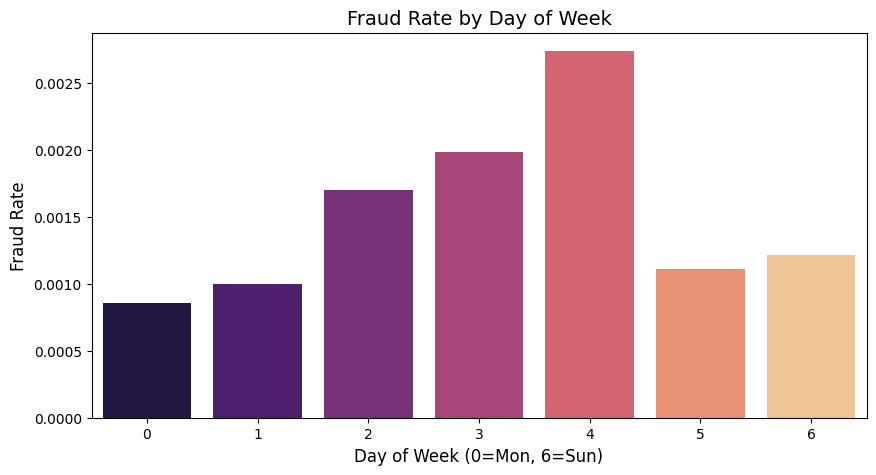

In [34]:
fraud_by_day = df.groupby('day_of_week')['isFraud'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette="magma")
plt.title("Fraud Rate by Day of Week", fontsize=14)
plt.xlabel("Day of Week (0=Mon, 6=Sun)", fontsize=12)
plt.ylabel("Fraud Rate", fontsize=12)
plt.show()

**Analysis**
* Same was done for the day. Friday, Thrusday and Wednesday have more fraud rate compared to others.
* Psychological interpretations can be made that may be because in these days most of working people are more busy and exhausted.

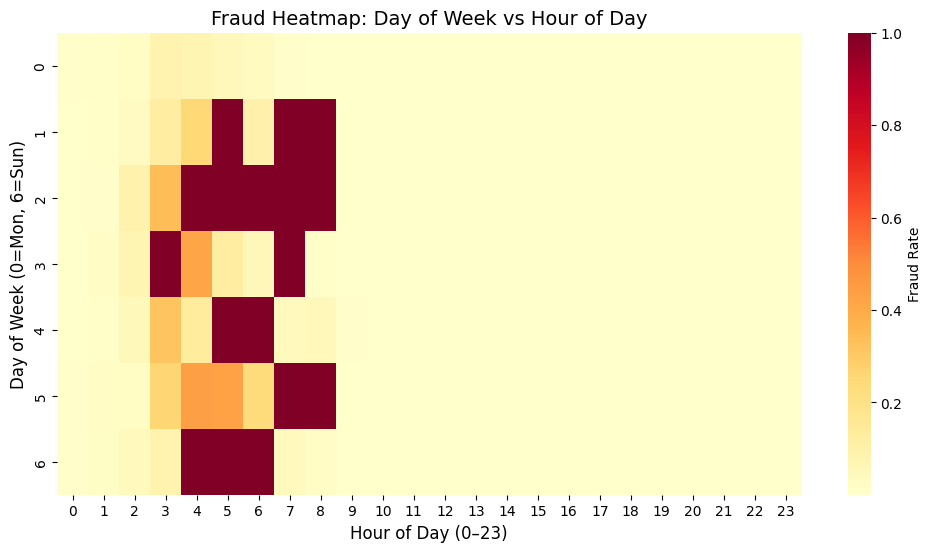

In [35]:
fraud_pivot = df.pivot_table(
    index='day_of_week', 
    columns='hour_of_day', 
    values='isFraud', 
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(fraud_pivot, cmap="YlOrRd", annot=False, cbar_kws={'label': 'Fraud Rate'})
plt.title("Fraud Heatmap: Day of Week vs Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (0–23)", fontsize=12)
plt.ylabel("Day of Week (0=Mon, 6=Sun)", fontsize=12)
plt.show()

**Analysis**
* It can be clearly seen through heatmap that between 1-8 hours everyday frauds transactions majorly happens.

          Total_Transactions  Fraud_Transactions  Fraud_Rate
type                                                        
TRANSFER              532902                4094    0.007682
CASH_OUT             2237496                4116    0.001840
CASH_IN              1399282                   0    0.000000
DEBIT                  41432                   0    0.000000
PAYMENT              2151493                   0    0.000000


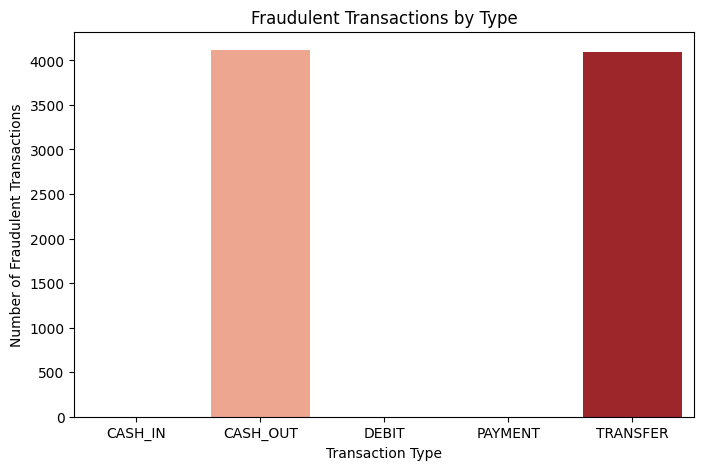

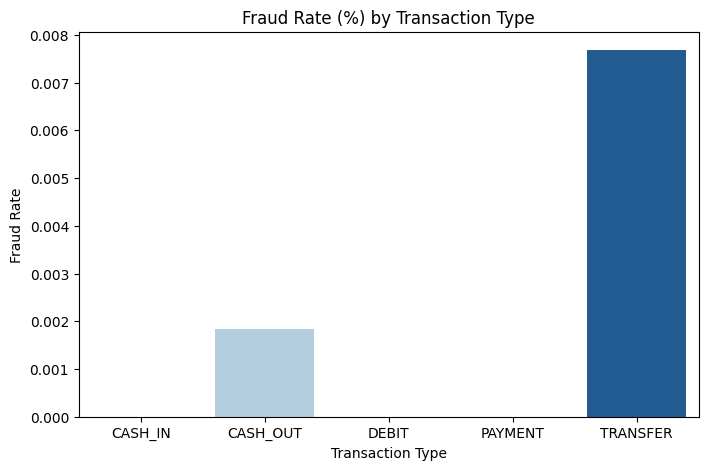

In [36]:
fraud_counts = df.groupby('type')['isFraud'].sum()
total_counts = df['type'].value_counts()
fraud_rate = (fraud_counts / total_counts).fillna(0)

type_fraud_summary = pd.DataFrame({
    'Total_Transactions': total_counts,
    'Fraud_Transactions': fraud_counts,
    'Fraud_Rate': fraud_rate
}).sort_values(by='Fraud_Rate', ascending=False)

print(type_fraud_summary)

#  Plot Fraud Counts by Type
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="Reds")
plt.title("Fraudulent Transactions by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

#  Plot Fraud Rate by Type
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette="Blues")
plt.title("Fraud Rate (%) by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

**Analysis**
* All the frauds transactions are made in two categories. Frauds target this categories.
* Security of these 'type' transactions can be increased with better validation.

/tmp/ipykernel_36/2060779548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['isFraud']==1].amount, bins=30, kde =True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


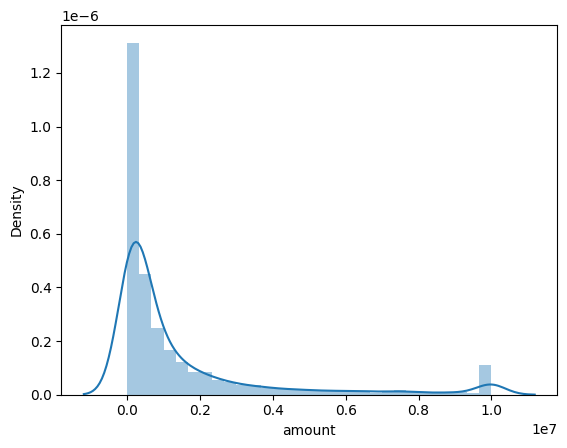

In [37]:
ax = sns.distplot(df[df['isFraud']==1].amount, bins=30, kde =True)

/tmp/ipykernel_36/1357361230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['isFraud']==0].amount, bins=30, kde =True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


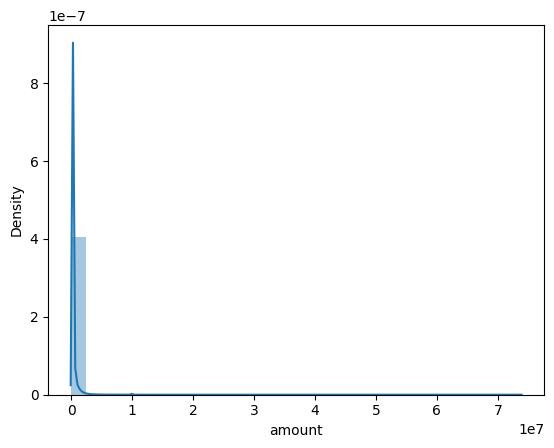

In [38]:
ax = sns.distplot(df[df['isFraud']==0].amount, bins=30, kde =True)

In [39]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

**Multi-collinearity Analysis**

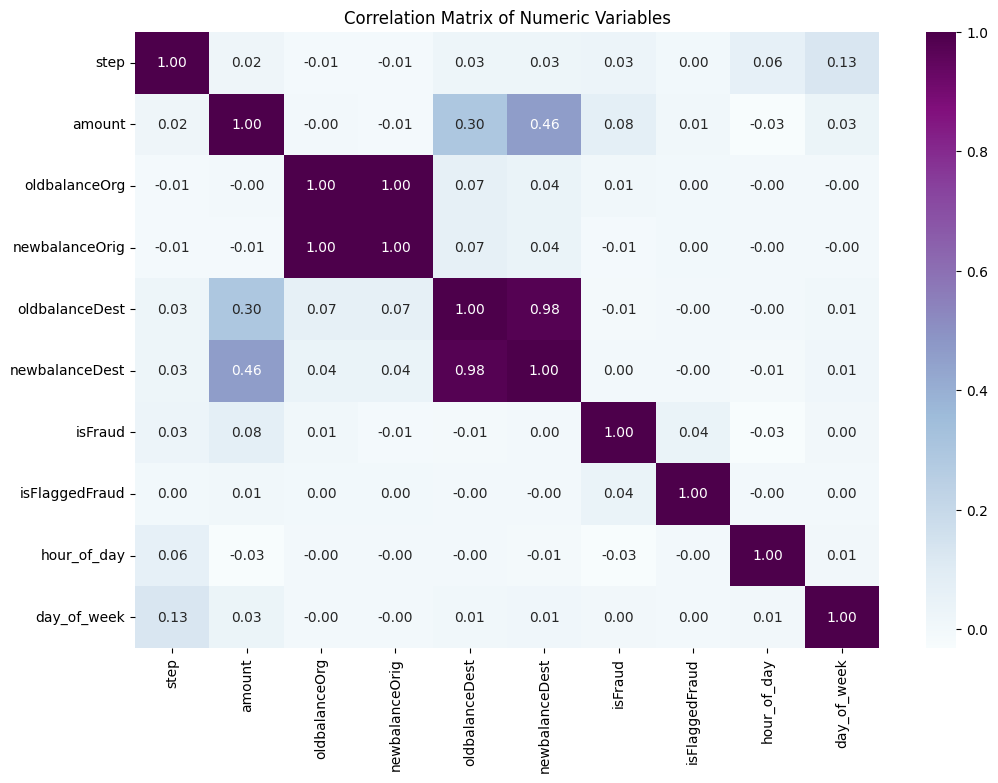

In [40]:
#Correlation matix of all numerical columns
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

**Analysis**
* Since (oldbalanceOrg and newbalanceOrig) and (oldbalanceDest, newbalanceDest) are highly correlated. Therefore some new feature are needed that will capture essence of both.

In [41]:
correlation_values = numeric_df.corr()['isFraud']

print(correlation_values)

step              0.031551
amount            0.076651
oldbalanceOrg     0.009909
newbalanceOrig   -0.008352
oldbalanceDest   -0.005912
newbalanceDest    0.000547
isFraud           1.000000
isFlaggedFraud    0.044117
hour_of_day      -0.031411
day_of_week       0.004942
Name: isFraud, dtype: float64


**Analysis**

In [42]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = numeric_df[list(numeric_df)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,548.267416,newbalanceOrig
2,545.777397,oldbalanceOrg
5,83.988799,newbalanceDest
4,72.345134,oldbalanceDest
1,4.098560,amount
8,4.023856,hour_of_day
0,3.587392,step
9,2.235540,day_of_week
6,1.188453,isFraud
7,1.002558,isFlaggedFraud


**Analysis**
* The following features are less correlated to isFraud:
  *   oldbalanceOrg
  *   newbalanceOrig
  *   oldbalanceDest
  *   newbalanceDest
  *   day_of_week

# Feature Engineering and Selection
* Creating new features by logical reasoning
* Droping less correlated features
* Transforming Features
* Changing categorical data to numerical data

**Creating new features**
* **errorBalanceOrig**:
  Formula: newbalanceOrig + amount - oldbalanceOrg

  In a legit transaction, error ≈ 0. In fraudulent transactions, balances often don’t match (frauds manipulate balance logs or the destination doesn’t actually receive destinmation.


* **errorBalanceDest** :

  Formula: newbalanceDest - amount - oldbalanceDest

  For valid transfers, the destination’s new balance = old balance + amount (so error ≈ 0). In fraud, sometimes the destination is a “mule” account where balances are not updated consistently → error is nonzero.


In [43]:
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['newbalanceDest'] - df['amount'] - df['oldbalanceDest']
df.loc[df['nameDest'].str.startswith("M"), 'errorBalanceDest'] = 0

**Creating new features**
* **amount_to_oldbalance_ratio**

  Formula: amount / oldbalanceOrg

  Fraud often drains a large fraction of an account (close to 1.0 ratio = sending nearly all balance). Transactions are usually a small fraction of balance. A customer won’t empty their bank account daily.


* **balance_change_ratio_orig**

  Formula: (oldbalanceOrg - newbalanceOrig) / oldbalanceOrg

  Measures how much of the account was depleted.
  If close to 1 → account wiped out (red flag).
  If close to 0 → small normal transaction.


* **balance_change_ratio_dest**

  Formula: (newbalanceDest - oldbalanceDest) / oldbalanceDest

  Fraud accounts often receive sudden large inflows relative to their size.

In [44]:
epsilon = 1e-10
df['amount_to_oldbalance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + epsilon)
df['balance_change_ratio_orig'] = (df['oldbalanceOrg'] - df['newbalanceOrig']) / (df['oldbalanceOrg'] + epsilon)
df['balance_change_ratio_dest'] = (df['newbalanceDest'] - df['oldbalanceDest']) / (df['oldbalanceDest'] + epsilon)


df.loc[df['nameDest'].str.startswith("M"), 'balance_change_ratio_dest'] = 0

features_to_plot = [
    'errorBalanceOrig',
    'errorBalanceDest',
    'amount_to_oldbalance_ratio',
    'balance_change_ratio_orig',
    'balance_change_ratio_dest'
]

df[features_to_plot] = df[features_to_plot].replace([np.inf, -np.inf], np.nan).fillna(0)

**Creating new features**
* **M**
  Since there is no record of accounts starting with 'M', therefore it is necessary to mention them different.

In [45]:
df['M']=(df['nameDest'].str.startswith("M")).astype(int)

**Dropping features**
Dropping irrelevent or less correlated features like:

In [46]:
df = df.drop(['nameOrig', 'nameDest','step','oldbalanceOrg','newbalanceOrig','day_of_week_name','day_of_week','oldbalanceDest','newbalanceDest'], axis = 1)

In [47]:
df.head()

,type,amount,isFraud,isFlaggedFraud,hour_of_day,errorBalanceOrig,errorBalanceDest,amount_to_oldbalance_ratio,balance_change_ratio_orig,balance_change_ratio_dest,M
0,PAYMENT,9839.64,0,0,1,0.0,0.0,0.057834,0.057834,0.0,1
1,PAYMENT,1864.28,0,0,1,0.0,0.0,0.087735,0.087735,0.0,1
2,TRANSFER,181.00,1,0,1,0.0,-181.0,1.000000,1.000000,0.0,0
3,CASH_OUT,181.00,1,0,1,0.0,-21363.0,1.000000,1.000000,-1.0,0
4,PAYMENT,11668.14,0,0,1,0.0,0.0,0.280795,0.280795,0.0,1


**Tansforming Feature**
* **hours_factor**
Since we have seen in EDA bivariate part that in less than 8 first hours of day, fraud transactions are recorded more. Therefore 'hours_factor' will be:
1: for hours less than or equal to 8
0: for hours more than 8

In [48]:
df['hours_factor']=(df['hour_of_day'] <= 8).astype(int)
df=df.drop(['hour_of_day',], axis = 1)
df.head()

,type,amount,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,amount_to_oldbalance_ratio,balance_change_ratio_orig,balance_change_ratio_dest,M,hours_factor
0,PAYMENT,9839.64,0,0,0.0,0.0,0.057834,0.057834,0.0,1,1
1,PAYMENT,1864.28,0,0,0.0,0.0,0.087735,0.087735,0.0,1,1
2,TRANSFER,181.00,1,0,0.0,-181.0,1.000000,1.000000,0.0,0,1
3,CASH_OUT,181.00,1,0,0.0,-21363.0,1.000000,1.000000,-1.0,0,1
4,PAYMENT,11668.14,0,0,0.0,0.0,0.280795,0.280795,0.0,1,1


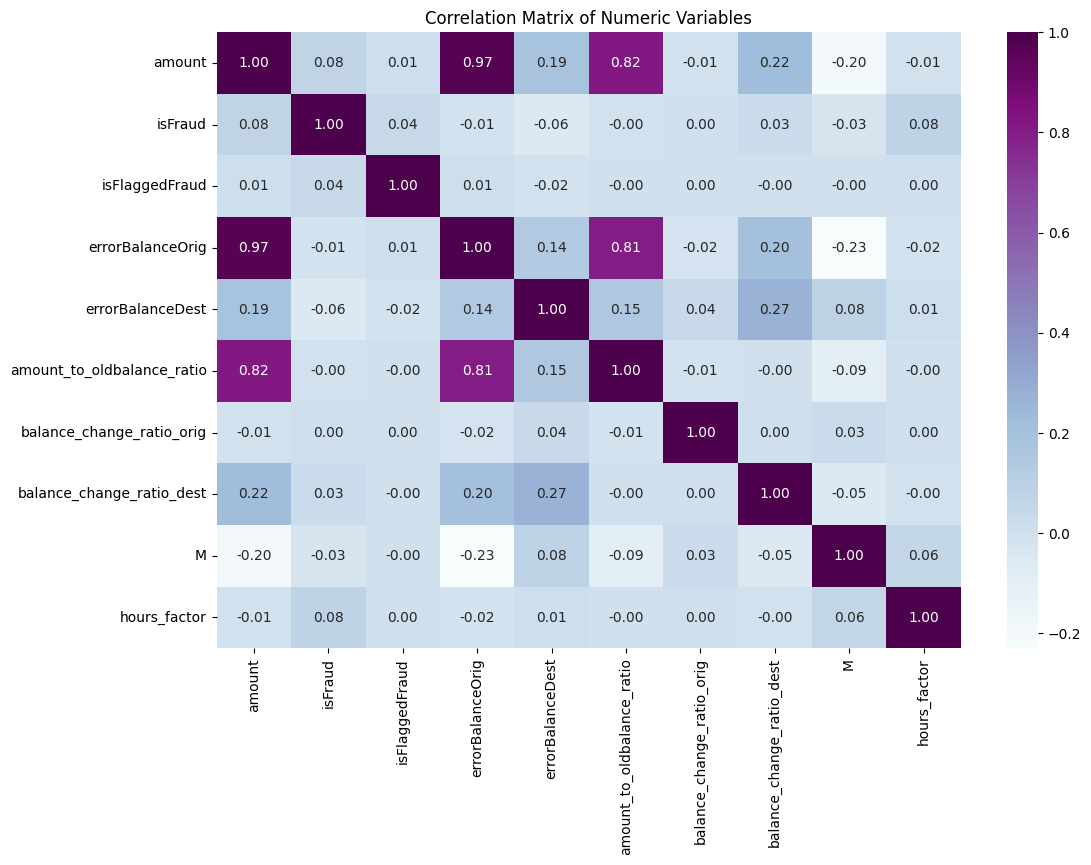

In [49]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

* We have improved from the last features.

**Categorical to numerical data** 
* 'type' a object type categorical data is converted to numerical data using **one-hot encoder** ( since there is not ordinal data).

In [50]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df = pd.concat([df, one_hot_df], axis=1)
df=df.drop(['type_DEBIT',],axis=1)

df.head()

,type,amount,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,amount_to_oldbalance_ratio,balance_change_ratio_orig,balance_change_ratio_dest,M,hours_factor,type_CASH_IN,type_CASH_OUT,type_PAYMENT,type_TRANSFER
0,PAYMENT,9839.64,0.0,0.0,0.0,0.0,0.057834,0.057834,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,PAYMENT,1864.28,0.0,0.0,0.0,0.0,0.087735,0.087735,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,TRANSFER,181.00,1.0,0.0,0.0,-181.0,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,CASH_OUT,181.00,1.0,0.0,0.0,-21363.0,1.000000,1.000000,-1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,PAYMENT,11668.14,0.0,0.0,0.0,0.0,0.280795,0.280795,0.0,1.0,1.0,0.0,0.0,1.0,0.0


**Dropping features**
* 'type' is dropped after conversion to numerical data.

In [51]:
df = df.drop(categorical_columns, axis=1)

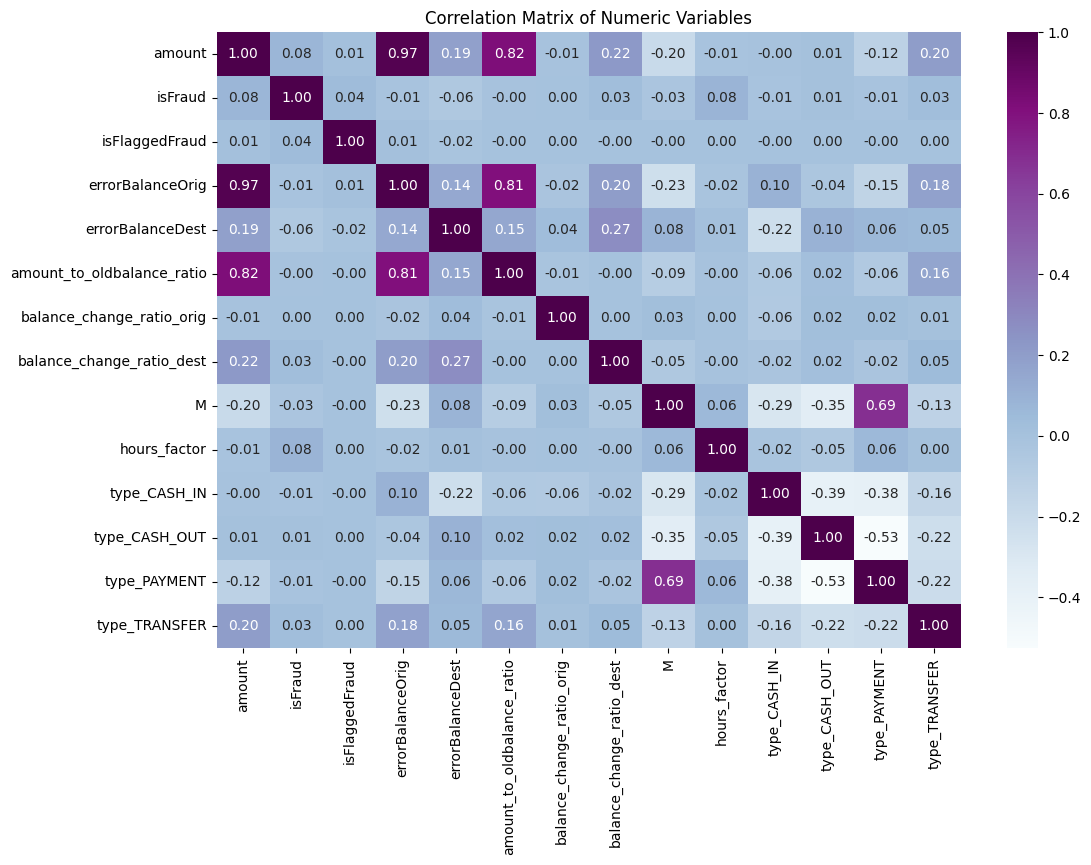

In [52]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Model training

In [53]:
# Splitting the data into X and y
df=df.dropna()
X = df.loc[:, df.columns != 'isFraud']
y =  df['isFraud']

In [54]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4453813, 13), (1908777, 13), (4453813,), (1908777,))

In [56]:
X_train

,amount,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,amount_to_oldbalance_ratio,balance_change_ratio_orig,balance_change_ratio_dest,M,hours_factor,type_CASH_IN,type_CASH_OUT,type_PAYMENT,type_TRANSFER
1745366,259716.53,0.0,218389.53,0.000000e+00,6.284427e+00,1.000000,0.776938,0.0,0.0,0.0,1.0,0.0,0.0
4486022,124.03,0.0,0.00,0.000000e+00,6.328061e-01,0.632806,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
5054958,216771.53,0.0,216771.53,-1.000000e-02,2.167715e+15,0.000000,0.214491,0.0,0.0,0.0,0.0,0.0,1.0
282075,3299.59,0.0,3299.59,0.000000e+00,3.299590e+13,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
3110527,69245.50,0.0,48540.50,0.000000e+00,3.344385e+00,1.000000,0.082402,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030802,264788.94,0.0,264630.94,0.000000e+00,1.675879e+03,1.000000,0.069077,0.0,0.0,0.0,1.0,0.0,0.0
491263,140745.33,0.0,140745.33,0.000000e+00,1.407453e+15,0.000000,0.074839,0.0,0.0,0.0,1.0,0.0,0.0
3937353,398915.01,0.0,398915.01,5.820766e-11,3.989150e+15,0.000000,0.891962,0.0,0.0,0.0,1.0,0.0,0.0
4686067,11885.95,0.0,11885.95,0.000000e+00,1.188595e+14,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [67]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, y_test) * 100

In [68]:
print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


print("Random Forest Score: ", random_forest_score)

TP,FP,TN,FN - Random Forest
True Positives: 2456
False Positives: 1
True Negatives: 1906314
False Negatives: 6
Random Forest Score:  99.99963327303294


**Imbalanced data Treatment** \
Using class_weight as 'balanced', which will divide equal percentage of data from isFraud and isNotFraud for each estimator. 

In [69]:
#Training Model
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [70]:
#Prediction
y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, y_test) * 100


# Modal Evaluaion

In [71]:

print("Random Forest Score (with balanced class weights): ", random_forest_score)

# Print TP, FP, TN, FN
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print("\nConfusion Matrix Results:")
print(f'True Positives (TP): {tp}')
print(f'False Positives (FP): {fp}')
print(f'True Negatives (TN): {tn}')
print(f'False Negatives (FN): {fn}')

# Print full classification report for detailed metrics
print("\nClassification Report (with balanced class weights):")
print(classification_report(y_test, y_pred_rf))

Random Forest Score (with balanced class weights):  99.99963327303294

Confusion Matrix Results:
True Positives (TP): 2456
False Positives (FP): 1
True Negatives (TN): 1906314
False Negatives (FN): 6

Classification Report (with balanced class weights):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1906315
         1.0       1.00      1.00      1.00      2462

    accuracy                           1.00   1908777
   macro avg       1.00      1.00      1.00   1908777
weighted avg       1.00      1.00      1.00   1908777



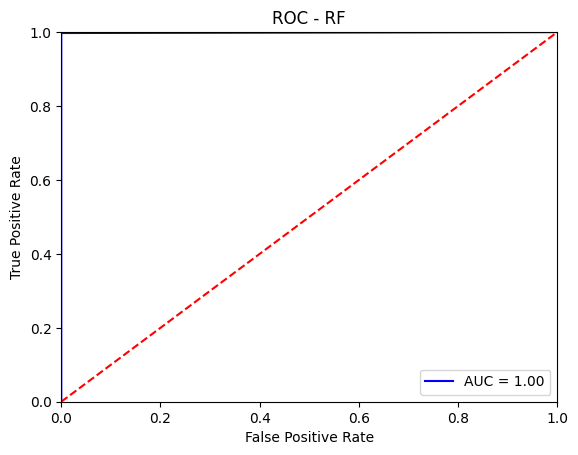

In [72]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
# Calculate feature importances
importances = random_forest.feature_importances_

# Assuming X_train is a pandas DataFrame, get the feature names
feature_names = X_train.columns

# Create a pandas Series for better visualization
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\nMean Decrease in Impurity (MDI) Feature Importances:")
print(feature_importances)


Mean Decrease in Impurity (MDI) Feature Importances:
errorBalanceOrig              0.290529
amount_to_oldbalance_ratio    0.266876
balance_change_ratio_orig     0.240294
M                             0.070511
amount                        0.055340
balance_change_ratio_dest     0.027605
errorBalanceDest              0.022143
hours_factor                  0.013534
type_PAYMENT                  0.004130
type_TRANSFER                 0.003462
type_CASH_IN                  0.003223
isFlaggedFraud                0.001519
type_CASH_OUT                 0.000834
dtype: float64


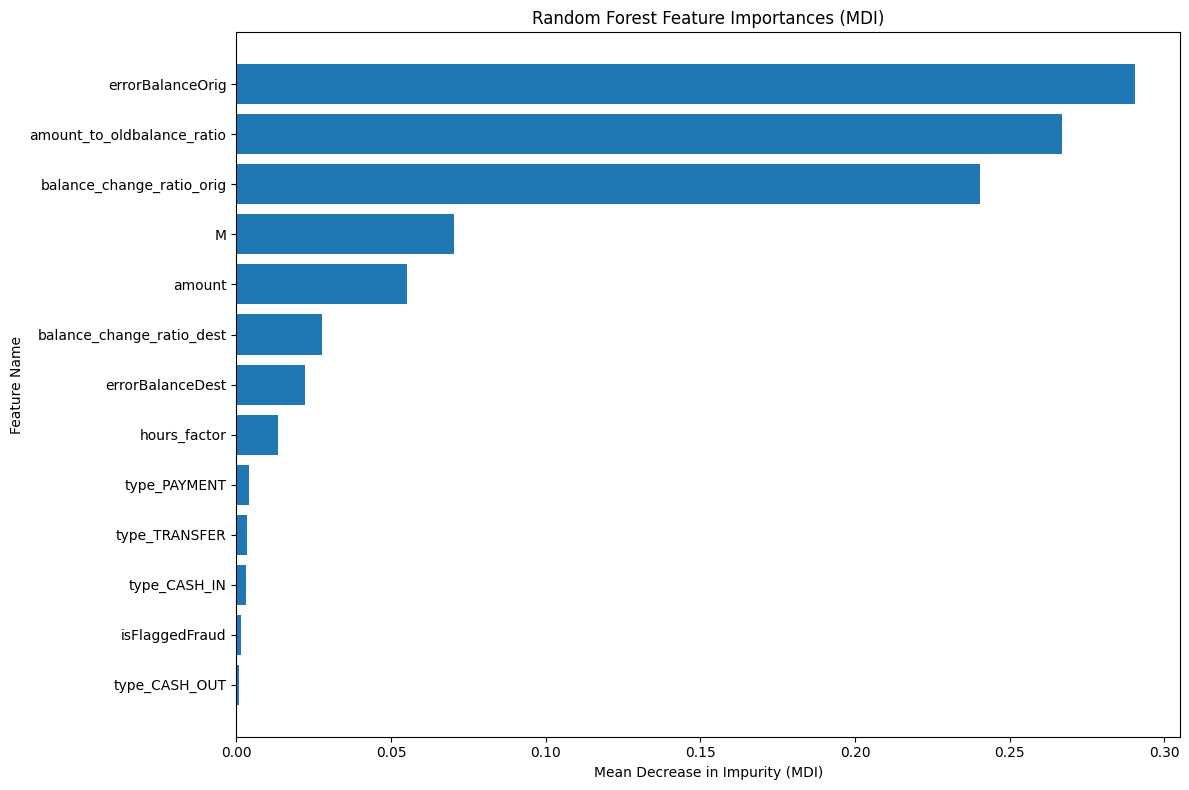

In [74]:
plt.figure(figsize=(12, 8)) # Adjust figure size for better readability
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel("Mean Decrease in Impurity (MDI)")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importances (MDI)")
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


# Answers to Important Questions

1. **Data Cleaning :**

   * Missing values :
     * The dataset given has no NaNs in core columns.
     * however, engineered features (especially ratios) can create NaN/Inf (e.g., division by zero when oldbalanceOrg == 0).
     * Action taken:
       * Used a small epsilon (1e-10) to stabilize denominators.
       * Replaced any remaining NaN/Inf in engineered features with 0 for safety (only for modeling; keep raw values intact for auditability). 

   * Outliers :
     * Interquatile method (IQR) was used to check outliers. But using IQR methoud would lead to large data loss. Therefore box-plots are used to plot and extreme outliers are removed.
  
   * Multi-collinearity :
     * 4 columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest) were found to be multi-collinear.
     * Feature engineering is done to create new features capturing the essence of these data, and these columns were dropped.
     * Merchant handling. Accounts starting with “M” represent merchants. Merchant balances can be inconsistent/missing by design. We set different variable to show merchant accounts. 


2. **Fraud Detection Model :**

   Given large class imbalance and nonlinear patterns, the notebook trained a RandomForestClassifier with class_weight='balanced' (to up-weight the minority class) on train/test split. Trees handle skew/outliers well and capture interactions without scaling.

**Pipeline outline:**
* **Feature engineering** :
  Time: hour_of_day = step % 24, day_of_week = (step//24)%7
  Balance logic: errorBalanceOrig, errorBalanceDest
  Proportion signals: amount_to_oldbalance_ratio, balance_change_ratio_dest
  Keeping amount, step, and one-hot encoded of type (TRANSFER/CASH_OUT are high-risk)
* **Split**: train_test_split
* **Model**: RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
  blanced for balancing unbalanced data.
* **Evaluation**: Confusion matrix, ROC-AUC, Recall, and cost-sensitive metrics.


3. **Variable selection :**

   Even though the simple correlations with isFraud are small (normal in fraud), these features add orthogonal predictive power:
   * **Amount** (absolute magnitude): large transfers can be riskier but are not decisive alone.
   * **Discrepancies**: errorBalanceOrig, errorBalanceDest
     In fraudulent transactions, balances often don’t match. Fraudsters manipulate balance logs or the destination doesn’t actually receive funds.
   * **Proportions**: amount_to_oldbalance_ratio, balance_change_ratio_orig, balance_change_ratio_dest
     Measure impact relative to account size (draining/windfall). Fraud tends to move a large fraction quickly.
   * **Time**: hour_of_day, day_of_week, and step
     Fraud spikes during unusual hours/days or early in the simulation horizon.
   * **isFlaggedFraud**: A weak rule-based flag; still useful in ensembles.
   * **type one-hot encoded** : TRANSFER and CASH_OUT concentrate fraud compared to others.

     

4. **Performance demonstration :**

   For imbalanced fraud, accuracy is misleading. We focused on:
   * **ROC-AUC**: overall ranking quality.
   * **PR** (Precision): quality on the positive (fraud) class under imbalance.
   * **Confusion matrix**:
   * **Recall**:

5. **Key drivers of fraud :**

   Shown in last figure:
   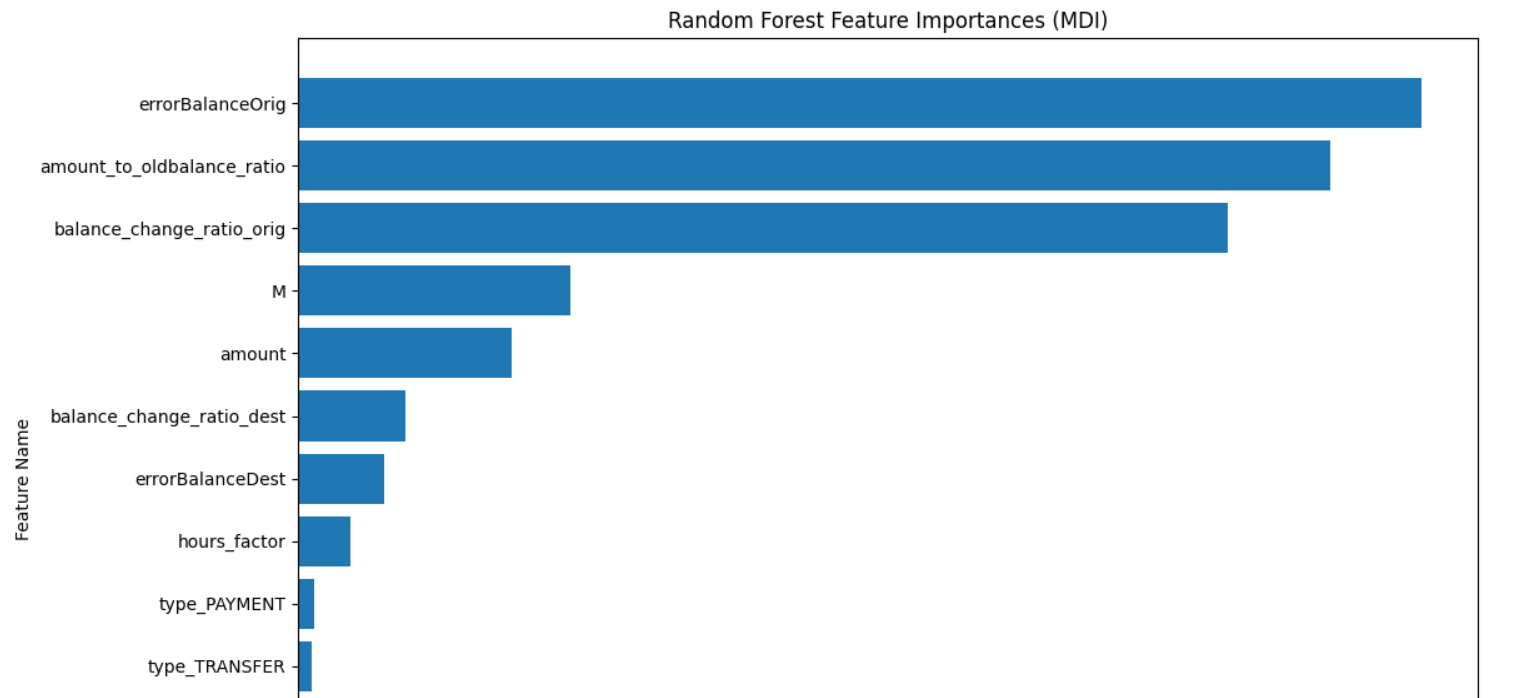

6. **Do these factors make sense?**

   The features selected by the model align well with fraud detection logic:

   **Used Features** (and why):
   * errorBalanceOrig, errorBalanceDest : detect inconsistencies in sender or receiver balances. Fraud often breaks the accounting identity.
   * amount_to_oldbalance_ratio, balance_change_ratio_orig, balance_change_ratio_dest : capture the proportional impact of transactions, fraudsters typically drain or inflate balances abnormally.
   * amount : absolute transaction size still adds signal, especially in combination with ratios.
   * hour_of_day, day_of_week (time features) : fraud occurs disproportionately at unusual times, we have seen in analysis part.
   * type (TRANSFER, CASH_OUT) and merchant indicator (M) : most fraud flows through these channels, so they’re strong categorical predictors.
   * isFlaggedFraud : although weak, it represents the system’s prior suspicion and can complement ML predictions.

   **Not Used** :
   * Raw balances (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest) : highly collinear with amount and already represented through engineered discrepancy/ratio features, which capture the same information in a more meaningful form.
   * step : absolute time step is less interpretable than derived features (hour_of_day, day_of_week), so we replaced it with cyclic patterns.
   * Names : this factor doesn't matter. 

7. **Prevention to adopt while updating infrastructure**

   * Real-time monitoring: Deploy streaming pipelines (Kafka/Spark/Flink) so transactions are scored instantly before completion.
   * Hybrid detection: Use a combination of rule-based filters (for obvious red flags like unusually large transfers) and machine learning models find patterns.
   * Stronger authentication: Apply step-up verification (OTP, biometrics) for high-risk transactions flagged by the model.
   * Anomaly and velocity checks: Limit rapid, repeated transfers and flag unusual spikes in transaction frequency or amounts.
   * Merchant and device fingerprinting: Track merchants, devices, and IP addresses involved in suspicious activity.

8. **How to determine if actions worked**

   * Key Performance Indicators (KPIs):
     * Fraud loss rate : total monetary losses due to fraud as a percentage of transaction volume (should decrease).
     * Detection rate (Recall) : proportion of actual frauds that are successfully flagged (should increase).
     * Precision : proportion of flagged transactions that are truly fraud, ensuring analysts’ efforts are focused on real cases.
     * False positive/customer friction rate : percentage of legitimate transactions incorrectly flagged (should remain low).
     * Operational efficiency : reduction in average time taken to detect and stop fraudulent activity.

   * Continuous Monitoring:
     * Track fraud trends over time to ensure that fraud losses stay consistently lower.
     * Monitor model drift and retrain the model as needed.
   
If the KPIs show reduced fraud losses, higher detection recall, and controlled false positives without degrading customer experience, then the prevention measures can be considered successful.